##This notebook is created for ABC2026 Decode the Invisible Challenge
https://sites.google.com/view/activity-location-challenge/the-challenge?authuser=0

prepared by: C.A. Garcia | Dec. 2025

**Data gathering in care facility (5th floor)**
- Beacons installed in facility as transmitter
- Mobile phone with app carried by caregiver acts as receiver
- Every location visited, RSSI is detected by mobile app.
- Accelerometer data is collected from the app of caregiver.

**User IDs used in Mobile App, each user carries a different phone**

->Location Server
- user ID 90: for 5th floor caregiver (collects sensor data - location and accelerometer)
- user ID 97: for 5th location labeling

->Activity Server
- user ID ID 87: for 5th activity labeling




In [ ]:
import pandas as pd
import numpy as np
import os
import datetime
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**#labels data UPDATE LOCATION IN YOUR DRIVE**

In [ ]:
#labels data UPDATE LOCATION IN YOUR DRIVE
data_path = '/content/drive/MyDrive/Colab Notebooks/.../ABC2026 Sozolab Challenge/Dataset/5f_label_loc_train.csv'

In [ ]:
df1 = pd.read_csv(data_path)
print(df1.shape)
df1.head(2)

(1334, 11)


,Unnamed: 0.1,Unnamed: 0,activity,started_at,finished_at,deleted_at,updated_at,user_id,user,room,floor
0,170,170,Location,2023-04-10 14:21:46+09:00,2023-04-10 14:21:50+09:00,NaN,2023-04-10 05:22:02 UTC,97,5th-location,kitchen,5th
1,171,171,Location,2023-04-10 14:21:55+09:00,2023-04-10 14:22:16+09:00,NaN,2023-04-10 05:23:02 UTC,97,5th-location,cafeteria,5th


**Update datetime format before filtering timestamp**

In [ ]:
df1["finished_at"] = pd.to_datetime(df1["finished_at"]).dt.tz_convert("Asia/Tokyo").dt.tz_localize(None)
df1["started_at"] = pd.to_datetime(df1["started_at"]).dt.tz_convert("Asia/Tokyo").dt.tz_localize(None)

In [ ]:
df1.sort_values(by='started_at')
df1.head(5)

,Unnamed: 0.1,Unnamed: 0,activity,started_at,finished_at,deleted_at,updated_at,user_id,user,room,floor
0,170,170,Location,2023-04-10 14:21:46+09:00,2023-04-10 14:21:50+09:00,NaN,2023-04-10 05:22:02 UTC,97,5th-location,kitchen,5th
1,171,171,Location,2023-04-10 14:21:55+09:00,2023-04-10 14:22:16+09:00,NaN,2023-04-10 05:23:02 UTC,97,5th-location,cafeteria,5th
2,172,172,Location,2023-04-10 14:22:23+09:00,2023-04-10 14:23:25+09:00,NaN,2023-04-10 05:24:01 UTC,97,5th-location,kitchen,5th
3,173,173,Location,2023-04-10 14:23:29+09:00,2023-04-10 14:23:44+09:00,NaN,2023-04-10 05:24:02 UTC,97,5th-location,cleaning,5th
4,174,174,Location,2023-04-10 14:23:42+09:00,2023-04-10 14:24:05+09:00,NaN,2023-04-10 05:25:03 UTC,97,5th-location,nurse station,5th


In [ ]:
df1.tail(5)

,Unnamed: 0.1,Unnamed: 0,activity,started_at,finished_at,deleted_at,updated_at,user_id,user,room,floor
1329,1518,1518,Location,2023-04-13 17:25:12+09:00,2023-04-13 17:25:13+09:00,NaN,2023-04-13 08:26:02 UTC,91,2nd-location,Cafeteria A,2nd
1330,1519,1519,Location,2023-04-13 17:25:17+09:00,2023-04-13 17:28:51+09:00,NaN,2023-04-13 08:29:01 UTC,91,2nd-location,Cafeteria D,2nd
1331,1520,1520,Location,2023-04-13 17:28:59+09:00,2023-04-13 17:29:04+09:00,NaN,2023-04-13 08:30:03 UTC,91,2nd-location,hallway,"2nd,5th"
1332,1521,1521,Location,2023-04-13 17:29:09+09:00,2023-04-13 17:29:57+09:00,NaN,2023-04-13 08:30:04 UTC,91,2nd-location,201,2nd
1333,1522,1522,Location,2023-04-13 17:29:19+09:00,2023-04-13 17:29:59+09:00,NaN,2023-04-13 08:31:02 UTC,91,2nd-location,hallway,"2nd,5th"


In [ ]:
df1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'activity', 'started_at', 'finished_at',
       'deleted_at', 'updated_at', 'user_id', 'user', 'room', 'floor'],
      dtype='object')

In [ ]:
df1=df1.drop(columns=['Unnamed: 0'])

In [ ]:
df1['user_id'].value_counts()

,count
user_id,
91,870
97,463
38,1


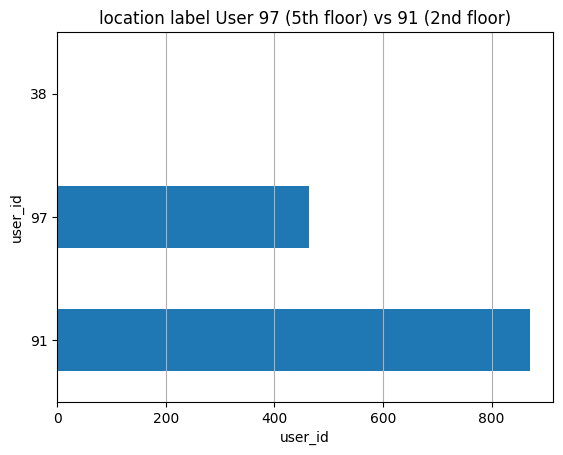

In [ ]:
#check user IDs

df1['user_id'].value_counts().plot(kind='barh',xlabel= 'user_id', title='location label User 97 (5th floor) vs 91 (2nd floor)').grid(axis='x'); #xlabel = 'activity count'

##Filter user to Location labeler ID 97

**check null values or missing user ID**

In [ ]:
#user ID
df1['user_id'].isnull().sum().sum()

np.int64(0)

**filter user ID to 97**

In [ ]:
df = df1.loc[df1['user_id'] == 97]
df.head()

,Unnamed: 0.1,activity,started_at,finished_at,deleted_at,updated_at,user_id,user,room,floor
0,170,Location,2023-04-10 14:21:46+09:00,2023-04-10 14:21:50+09:00,NaN,2023-04-10 05:22:02 UTC,97,5th-location,kitchen,5th
1,171,Location,2023-04-10 14:21:55+09:00,2023-04-10 14:22:16+09:00,NaN,2023-04-10 05:23:02 UTC,97,5th-location,cafeteria,5th
2,172,Location,2023-04-10 14:22:23+09:00,2023-04-10 14:23:25+09:00,NaN,2023-04-10 05:24:01 UTC,97,5th-location,kitchen,5th
3,173,Location,2023-04-10 14:23:29+09:00,2023-04-10 14:23:44+09:00,NaN,2023-04-10 05:24:02 UTC,97,5th-location,cleaning,5th
4,174,Location,2023-04-10 14:23:42+09:00,2023-04-10 14:24:05+09:00,NaN,2023-04-10 05:25:03 UTC,97,5th-location,nurse station,5th


In [ ]:
##confirm labels only from user ID 97
df['user_id'].value_counts()

,count
user_id,
97,463


##Clean data (review timestamps, drop duplicates and null, empty or NaT)

**check if timestamps have defined start and finished time for duration**

In [ ]:
df['started_at'].isnull().sum()

np.int64(0)

In [ ]:
df['finished_at'].isnull().sum()

np.int64(0)

##Drop duplicates and null, empty or NaT

In [ ]:
#drop no start
a = df[pd.notnull(df['started_at'])]

In [ ]:
#drop no end time (no duration)
b = a[pd.notnull(a['finished_at'])]
b

,Unnamed: 0.1,activity,started_at,finished_at,deleted_at,updated_at,user_id,user,room,floor
0,170,Location,2023-04-10 14:21:46+09:00,2023-04-10 14:21:50+09:00,NaN,2023-04-10 05:22:02 UTC,97,5th-location,kitchen,5th
1,171,Location,2023-04-10 14:21:55+09:00,2023-04-10 14:22:16+09:00,NaN,2023-04-10 05:23:02 UTC,97,5th-location,cafeteria,5th
2,172,Location,2023-04-10 14:22:23+09:00,2023-04-10 14:23:25+09:00,NaN,2023-04-10 05:24:01 UTC,97,5th-location,kitchen,5th
3,173,Location,2023-04-10 14:23:29+09:00,2023-04-10 14:23:44+09:00,NaN,2023-04-10 05:24:02 UTC,97,5th-location,cleaning,5th
4,174,Location,2023-04-10 14:23:42+09:00,2023-04-10 14:24:05+09:00,NaN,2023-04-10 05:25:03 UTC,97,5th-location,nurse station,5th
...,...,...,...,...,...,...,...,...,...,...
1300,1488,Location,2023-04-13 17:00:46+09:00,2023-04-13 17:00:55+09:00,NaN,2023-04-13 08:02:01 UTC,97,5th-location,nurse station,5th
1303,1491,Location,2023-04-13 17:01:53+09:00,2023-04-13 17:02:35+09:00,NaN,2023-04-13 08:03:02 UTC,97,5th-location,510,5th
1306,1494,Location,2023-04-13 17:02:55+09:00,2023-04-13 17:03:53+09:00,NaN,2023-04-13 08:04:02 UTC,97,5th-location,kitchen,5th
1310,1498,Location,2023-04-13 17:05:00+09:00,2023-04-13 17:07:48+09:00,NaN,2023-04-13 08:08:02 UTC,97,5th-location,nurse station,5th


**filter columns that have deleted time (meaning user has deleted this entry)**

In [ ]:
dx = b["deleted_at"].dropna()
dx.value_counts().sum()

np.int64(9)

In [ ]:
#cleaned overall labels
dfr = b[~b["deleted_at"].isin(dx)]
dfr

,Unnamed: 0.1,activity,started_at,finished_at,deleted_at,updated_at,user_id,user,room,floor
0,170,Location,2023-04-10 14:21:46+09:00,2023-04-10 14:21:50+09:00,NaN,2023-04-10 05:22:02 UTC,97,5th-location,kitchen,5th
1,171,Location,2023-04-10 14:21:55+09:00,2023-04-10 14:22:16+09:00,NaN,2023-04-10 05:23:02 UTC,97,5th-location,cafeteria,5th
2,172,Location,2023-04-10 14:22:23+09:00,2023-04-10 14:23:25+09:00,NaN,2023-04-10 05:24:01 UTC,97,5th-location,kitchen,5th
3,173,Location,2023-04-10 14:23:29+09:00,2023-04-10 14:23:44+09:00,NaN,2023-04-10 05:24:02 UTC,97,5th-location,cleaning,5th
4,174,Location,2023-04-10 14:23:42+09:00,2023-04-10 14:24:05+09:00,NaN,2023-04-10 05:25:03 UTC,97,5th-location,nurse station,5th
...,...,...,...,...,...,...,...,...,...,...
1300,1488,Location,2023-04-13 17:00:46+09:00,2023-04-13 17:00:55+09:00,NaN,2023-04-13 08:02:01 UTC,97,5th-location,nurse station,5th
1303,1491,Location,2023-04-13 17:01:53+09:00,2023-04-13 17:02:35+09:00,NaN,2023-04-13 08:03:02 UTC,97,5th-location,510,5th
1306,1494,Location,2023-04-13 17:02:55+09:00,2023-04-13 17:03:53+09:00,NaN,2023-04-13 08:04:02 UTC,97,5th-location,kitchen,5th
1310,1498,Location,2023-04-13 17:05:00+09:00,2023-04-13 17:07:48+09:00,NaN,2023-04-13 08:08:02 UTC,97,5th-location,nurse station,5th


In [ ]:
#check for any duplicates
dfr.duplicated().sum()

np.int64(0)

In [ ]:
#Filter to only location labels
df = dfr.loc[dfr['activity'] == 'Location']
df.head(3)

,Unnamed: 0.1,activity,started_at,finished_at,deleted_at,updated_at,user_id,user,room,floor
0,170,Location,2023-04-10 14:21:46+09:00,2023-04-10 14:21:50+09:00,NaN,2023-04-10 05:22:02 UTC,97,5th-location,kitchen,5th
1,171,Location,2023-04-10 14:21:55+09:00,2023-04-10 14:22:16+09:00,NaN,2023-04-10 05:23:02 UTC,97,5th-location,cafeteria,5th
2,172,Location,2023-04-10 14:22:23+09:00,2023-04-10 14:23:25+09:00,NaN,2023-04-10 05:24:01 UTC,97,5th-location,kitchen,5th


In [ ]:
#drop extra colummns
df=df.drop(columns=['activity', 'deleted_at', 'updated_at'])

In [ ]:
#Check if user is on the same floor (5th floor)
df['user'].value_counts()

,count
user,
5th-location,451


In [ ]:
df['floor'].value_counts()

,count
floor,
5th,410
"2nd,5th",41


##Check rooms visited by caregiver

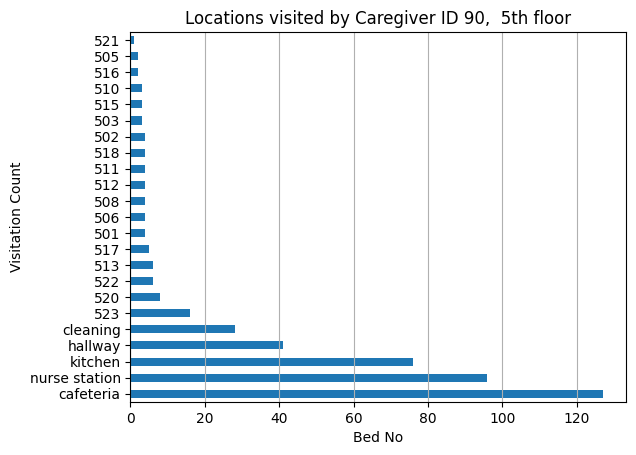

In [ ]:
df['room'].value_counts().plot(kind='barh', xlabel= 'Bed No', ylabel= 'Visitation Count', title='Locations visited by Caregiver ID 90,  5th floor').grid(axis='x')

In [ ]:
df['room'].value_counts()

,count
room,
cafeteria,127
nurse station,96
kitchen,76
hallway,41
cleaning,28
523,16
520,8
522,6
513,6


**add duration column**

In [ ]:
df["started_at"] = pd.to_datetime(df["started_at"])
df["finished_at"] = pd.to_datetime(df["finished_at"])
duration = df["finished_at"] - df["started_at"]
duration

,0
0,0 days 00:00:04
1,0 days 00:00:21
2,0 days 00:01:02
3,0 days 00:00:15
4,0 days 00:00:23
...,...
1300,0 days 00:00:09
1303,0 days 00:00:42
1306,0 days 00:00:58
1310,0 days 00:02:48


In [ ]:
#display duration in minutes
duration_s = duration.dt.total_seconds()
duration_min = duration_s/60
duration_min

,0
0,0.066667
1,0.350000
2,1.033333
3,0.250000
4,0.383333
...,...
1300,0.150000
1303,0.700000
1306,0.966667
1310,2.800000


In [ ]:
df["duration"] = duration

In [ ]:
df["duration_min"] = duration_min
df = df.sort_values(by=['duration_min'])

df.tail(3)

,Unnamed: 0.1,started_at,finished_at,user_id,user,room,floor,duration,duration_min
314,487,2023-04-11 15:52:13+09:00,2023-04-11 16:17:35+09:00,97,5th-location,nurse station,5th,0 days 00:25:22,25.366667
999,1176,2023-04-13 11:59:43+09:00,2023-04-13 12:32:25+09:00,97,5th-location,523,5th,0 days 00:32:42,32.700000
583,757,2023-04-12 11:55:46+09:00,2023-04-12 12:32:54+09:00,97,5th-location,523,5th,0 days 00:37:08,37.133333


In [ ]:
#up to you to remove zero duration or retain
df["duration_min"] = duration_min
df = df.sort_values(by=['duration_min'])

df.head(3)

,Unnamed: 0.1,started_at,finished_at,user_id,user,room,floor,duration,duration_min
563,737,2023-04-12 11:44:41+09:00,2023-04-12 11:44:41+09:00,97,5th-location,cleaning,5th,0 days,0.0
75,247,2023-04-10 16:14:00+09:00,2023-04-10 16:14:00+09:00,97,5th-location,hallway,"2nd,5th",0 days,0.0
1067,1244,2023-04-13 14:29:21+09:00,2023-04-13 14:29:21+09:00,97,5th-location,cafeteria,5th,0 days,0.0


**you can save this version of the cleaned label**

In [ ]:
##example, change the location of file to your desired folder in drive
##df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/..../location_train_labels.csv')

In [ ]:
import plotly.express as px

#plotting simple boxplot for parch by age
fig = px.box(df, x="duration_min",y="room",category_orders={"room": ['501','502','503','505','506','507','508','510','511','512','513','515','516','517','518','520','521','522','523','cleaning','kitchen','hallway','nurse station','cafeteria']}) #points="all"

fig.update_layout(
    plot_bgcolor='white'
)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    linecolor='black'
)


fig.show()

In [ ]:
px.histogram(data_frame=df,x='duration_min',color='room',barmode='group',title='Duration of Stay per Room, 04.10.2023 - 04.13.2023')

In [ ]:
import pandas as pd
import plotly.express as px

# Create DataFrame
df['started_at'] = pd.to_datetime(df['started_at'])  # Convert to datetime format

# Extract year, month, and day from the "started_at" column
df['year_month_day'] = df['started_at'].dt.to_period('D').dt.strftime('%Y-%m-%d')

# Calculate the count of activities per day within each month
room_per_day = df.groupby(['year_month_day', 'room']).size().reset_index(name='count')

# Create bar chart using plotly
fig = px.bar(
    data_frame=room_per_day,
    x='year_month_day',
    y='count',
    color='room',
    title='Rooms Visited per day by Caregiver (5th floor), 04.10.2023 - 04.13.2023',
    text='count',  # Display count values on the bars
)

# Show the plot
fig.show()


/tmp/ipython-input-2161074285.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
import pandas as pd
import plotly.express as px

# Create DataFrame
df['started_at'] = pd.to_datetime(df['started_at'])  # Convert to datetime format

# Extract year, month, and day from the "started_at" column
df['year_month_day'] = df['started_at'].dt.to_period('D').dt.strftime('%Y-%m-%d')

# Calculate the total count of activities per day
total_per_day = df.groupby('year_month_day').size().reset_index(name='count')

# Create bar chart using plotly
fig = px.bar(
    data_frame=total_per_day,
    x='year_month_day',
    y='count',
    title='Rooms Visited per day by Caregiver (5th floor), 04.10.2023 - 04.13.2023',
    text='count',  # Display count values on the bars
)

# Show the plot
fig.show()

/tmp/ipython-input-2401659270.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
import pandas as pd
import plotly.express as px

# Create DataFrame
df['started_at'] = pd.to_datetime(df['started_at'])  # Convert to datetime format

# Extract year, month, day, and hour from the "started_at" column
df['hour'] = df['started_at'].dt.hour

# Calculate the count of activities per hour within each day
activities_per_hour = df.groupby(['year_month_day', 'hour']).size().reset_index(name='count')

# Create bar chart using plotly
fig = px.bar(
    data_frame=activities_per_hour,
    x='hour',
    y='count',
    animation_frame='year_month_day',
    title='Hourly Room Visit per Day by Caregiver, 04.10.2023 - 04.13.2023',
    labels={'hour': 'Hour of the Day', 'count': 'Visitation Count'},
)

# Show the plot
fig.show()

##Duration spent per Room

In [ ]:
sum_dur_loc = df.groupby("room")['duration_min'].sum().reset_index()
print(sum_dur_loc)

             room  duration_min
0             501     12.500000
1             502      6.416667
2             503     10.733333
3             505      0.516667
4             506      6.666667
5             508      4.200000
6             510      7.400000
7             511      8.500000
8             512     22.133333
9             513     38.166667
10            515     13.333333
11            516      0.483333
12            517      3.066667
13            518      2.566667
14            520     23.150000
15            521      0.016667
16            522     19.316667
17            523    165.816667
18      cafeteria    136.016667
19       cleaning     30.116667
20        hallway     26.750000
21        kitchen    236.133333
22  nurse station    227.066667


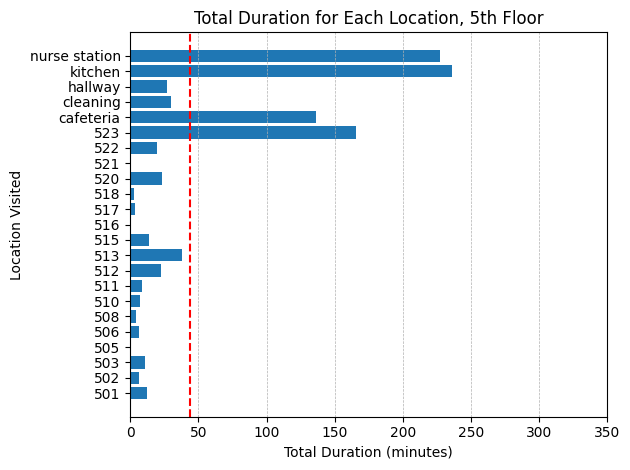

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data plotting code with the x and y axes swapped
plt.barh(sum_dur_loc['room'], sum_dur_loc['duration_min'])  # Use barh instead of bar
plt.axvline(sum_dur_loc['duration_min'].mean(), color='red', linestyle='--', label='Total Duration')  # Adjust axvline for y-axis
plt.ylabel('Location Visited')  # Label for the y-axis (formerly x-axis)
plt.xlabel('Total Duration (minutes)')  # Label for the x-axis (formerly y-axis)
plt.title('Total Duration for Each Location, 5th Floor')
plt.xlim(0, 350)  # Adjust limits for the y-axis (formerly x-axis)
plt.grid(axis='x', linestyle='--', linewidth=0.5)  # Grid for the y-axis

plt.tight_layout()
plt.show()


In [ ]:
min_dur_loc = df.groupby("room")['duration_min'].min().reset_index()
print(min_dur_loc)

             room  duration_min
0             501      2.116667
1             502      0.366667
2             503      0.233333
3             505      0.050000
4             506      0.283333
5             508      0.350000
6             510      0.700000
7             511      0.550000
8             512      1.000000
9             513      0.316667
10            515      3.400000
11            516      0.200000
12            517      0.016667
13            518      0.066667
14            520      0.033333
15            521      0.016667
16            522      0.083333
17            523      0.033333
18      cafeteria      0.000000
19       cleaning      0.000000
20        hallway      0.000000
21        kitchen      0.000000
22  nurse station      0.016667


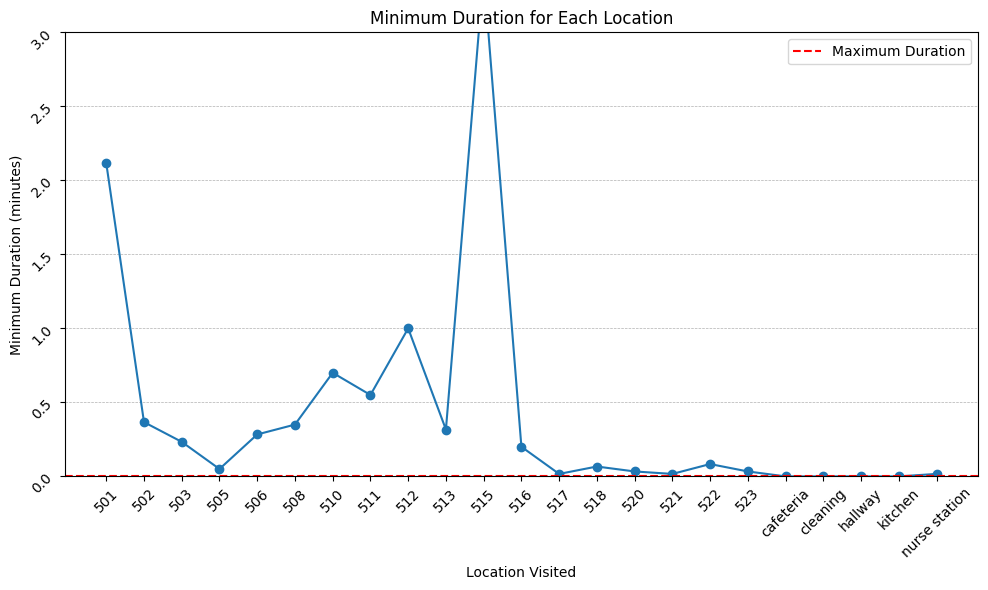

In [ ]:
import matplotlib.pyplot as plt

# Your data plotting code with x and y axis labels rotated
plt.figure(figsize=(10, 6))
plt.plot(min_dur_loc.index, min_dur_loc['duration_min'], marker='o')
plt.axhline(min_dur_loc['duration_min'].min(), color='red', linestyle='--', label='Maximum Duration')
plt.xlabel('Location Visited')
plt.ylabel('Minimum Duration (minutes)')
plt.title('Minimum Duration for Each Location')

# Rotate x-axis and y-axis labels (adjust rotation angles as needed)
plt.xticks(min_dur_loc.index, min_dur_loc['room'], rotation=45)
plt.yticks(rotation=45)

plt.legend()
plt.ylim(0, 3)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
max_dur_loc = df.groupby("room")['duration_min'].max().reset_index()
print(max_dur_loc)

             room  duration_min
0             501      3.683333
1             502      4.616667
2             503      6.583333
3             505      0.466667
4             506      2.900000
5             508      2.616667
6             510      4.066667
7             511      3.766667
8             512      7.583333
9             513     13.483333
10            515      4.966667
11            516      0.283333
12            517      1.633333
13            518      1.450000
14            520      8.133333
15            521      0.016667
16            522      6.733333
17            523     37.133333
18      cafeteria     15.166667
19       cleaning     12.300000
20        hallway      6.116667
21        kitchen     20.866667
22  nurse station     25.366667


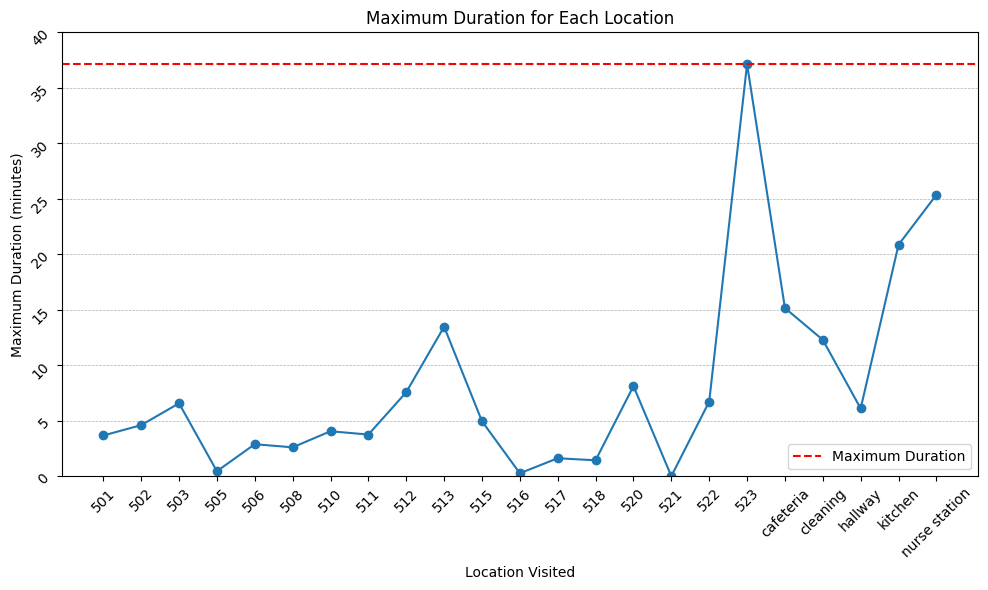

In [ ]:
import matplotlib.pyplot as plt

# Your data plotting code with x and y axis labels rotated
plt.figure(figsize=(10, 6))
plt.plot(max_dur_loc.index, max_dur_loc['duration_min'], marker='o')
plt.axhline(max_dur_loc['duration_min'].max(), color='red', linestyle='--', label='Maximum Duration')
plt.xlabel('Location Visited')
plt.ylabel('Maximum Duration (minutes)')
plt.title('Maximum Duration for Each Location')

# Rotate x-axis and y-axis labels (adjust rotation angles as needed)
plt.xticks(max_dur_loc.index, max_dur_loc['room'], rotation=45)
plt.yticks(rotation=45)

plt.legend()
plt.ylim(0, 40)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
mean_dur_loc = df.groupby("room")['duration_min'].mean().reset_index()
print(mean_dur_loc)

             room  duration_min
0             501      3.125000
1             502      1.604167
2             503      3.577778
3             505      0.258333
4             506      1.666667
5             508      1.050000
6             510      2.466667
7             511      2.125000
8             512      5.533333
9             513      6.361111
10            515      4.444444
11            516      0.241667
12            517      0.613333
13            518      0.641667
14            520      2.893750
15            521      0.016667
16            522      3.219444
17            523     10.363542
18      cafeteria      1.070997
19       cleaning      1.075595
20        hallway      0.652439
21        kitchen      3.107018
22  nurse station      2.365278


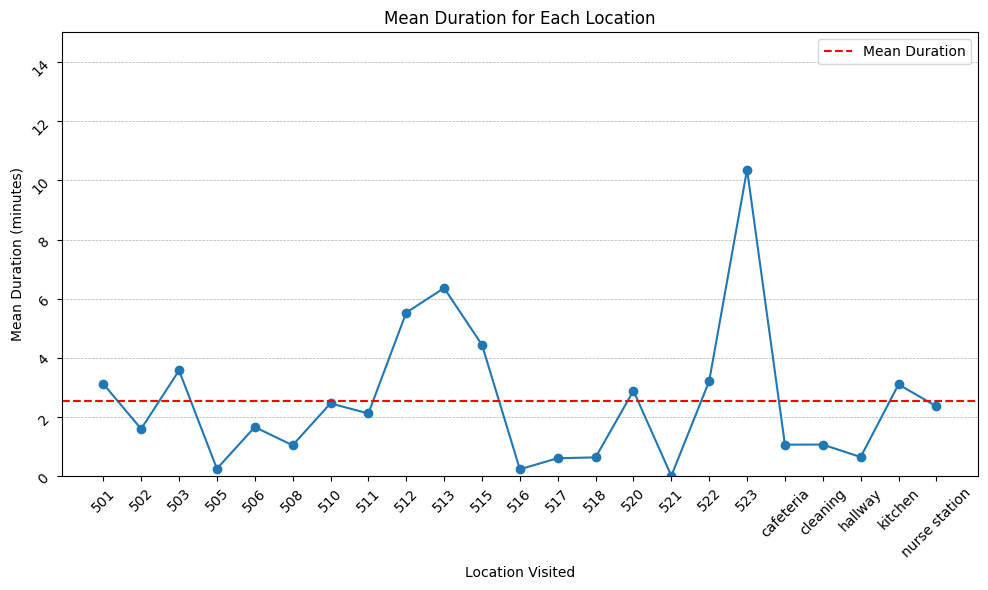

In [ ]:
import matplotlib.pyplot as plt

# Your data plotting code with x and y axis labels rotated
plt.figure(figsize=(10, 6))
plt.plot(mean_dur_loc.index, mean_dur_loc['duration_min'], marker='o')
plt.axhline(mean_dur_loc['duration_min'].mean(), color='red', linestyle='--', label='Mean Duration')
plt.xlabel('Location Visited')
plt.ylabel('Mean Duration (minutes)')
plt.title('Mean Duration for Each Location')

# Rotate x-axis and y-axis labels (adjust rotation angles as needed)
plt.xticks(mean_dur_loc.index, mean_dur_loc['room'], rotation=45)
plt.yticks(rotation=45)

plt.legend()
plt.ylim(0, 15)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()